<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/Flecha_Cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="cojinete.png">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

$$ x_1 : \text{ Diámetro del espacio en el cojinete, que sigue una distribución normal }$$ $$ N(1.5,0.04) $$

$$x_2: \text{ Diámetro de la flecha, que sigue una distribución normal }$$ $$ N(1.48,0.03)$$

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_2 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

* Si $x_2 - x_1 > 0 $ ,  hay interferencia (la flecha es más grande que el espacio en el cojinete).

* Si $x_2 - x_1 \leq 0 $ ,las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

* Llamaremos a la función interferencia, que ejecuta el código anterior y devuelve 1 o 0 según haya interferencia o no.

In [3]:
interferencia()

1

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [20]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

* Realizaremos 50000 iteraciones al experimento, con ayuda de nuestra funcion definida anteriormente iremos acumulando la probabilidad de interferencia en cada iteración.

In [21]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

* Se graficara cómo esta probabilidad converge a medida que aumenta el número de iteraciones

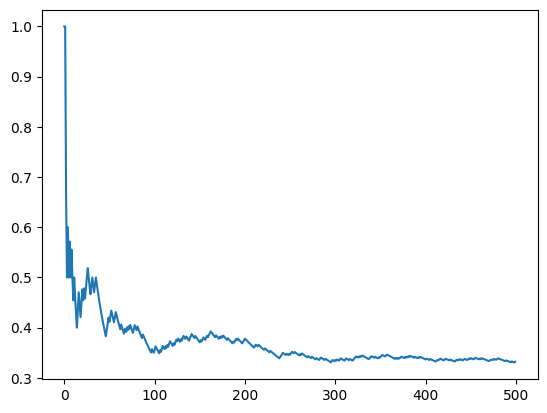

In [22]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

* Imprimimos la media y la desviación estándar de las probabilidades acumulativas.

In [23]:
print(np.mean(X), np.std(X))

0.36826967319896464 0.058908841999344985


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [8]:
def modelo(n):
    lista=[].                        # Inicializamos una lista vacía para almacenar las medias de las probabilidades
    for i in range(n):               # Repetimos el experimento 'n' veces
        s = prob_inter(500)          # Ejecutamos la función 'prob_inter' para realizar el experimento
        lista.append(np.mean(s))     # Calculamos la media de las probabilidades obtenidas y la agregamos a la lista 'lista'
    return lista

In [9]:
Y=modelo(120)         # Llamamos a la función 'modelo' para repetir el experimento 120 veces

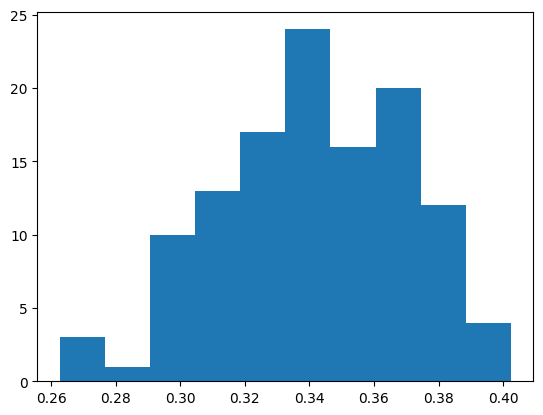

In [10]:
plt.hist(Y)          # Graficamos un histograma de las medias de las probabilidades
plt.show()

In [24]:
print(np.mean(Y), np.std(Y))     # Calculamos la media y la desviación estándar de las medias de las probabilidades

0.34218392646191326 0.029297447150304787


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [12]:
np.mean(Y)

0.34218392646191326

In [13]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.33406308842975074, 0.35030476449407577)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [14]:
N = (2*np.std(X)*1.96/0.01)**2

In [15]:
print(N)

376.6287004452759


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal, la cual nos dice que:

* Si $X$ y $Y$ son variables aleatorias independientes con distribuciones normales $$X \sim N(\mu_X,\sigma^2_X)$$ y $$Y \sim N(\mu_Y,\sigma^2_Y)$$
entonces $X-Y$ sigue una distribución normal con media igual a la diferencia de las medias y varianza igual a la suma de las varianzas de las dos variables originales.
En este caso $x_1$ y $x_2$ son independientes y tienen distribuciones normales, por lo que podemos aplicar este teorema para encontrar la distribución de $x_2-x_1$

De lo anterior tenemos que

$$ x_2 - x_1 \sim N(1.48-1.5,\sqrt{(0.03)^2+(0.04)^2})$$

In [16]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [17]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0023943319277625608